* https://www.youtube.com/watch?v=SD3irxdKfxk
* https://www.youtube.com/watch?v=LzxiFnBLnEY
* https://www.youtube.com/watch?v=9GMMXScMo9s
* https://www.youtube.com/watch?v=GWFC2_9_iVk
* https://www.mdpi.com/2076-3417/10/16/5510#:~:text=We%20found%20that%20the%20use,to%20obtain%20efficient%20product%20recommendations.
* https://medium.com/@iampatricolee18/autoencoder-k-means-clustering-epl-players-by-their-career-statistics-f38e2ea6e375

# Data Cleanig and Processing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
pd.set_option('display.max_columns', None)

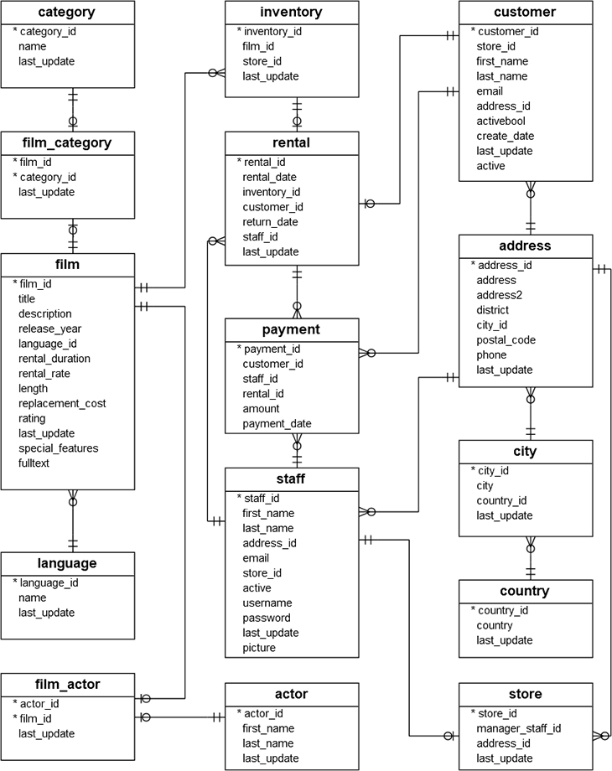actor_info

In [3]:
rental = pd.read_csv("Data/rental.csv")

In [ ]:
customer = pd.read_csv("Data/customer.csv")

Merging Customer and rental

In [ ]:
rental.head()

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1,2006-02-16 02:30:53
1,3,2005-05-24 23:03:39,1711,408,2005-06-01 22:12:39,1,2006-02-16 02:30:53
2,4,2005-05-24 23:04:41,2452,333,2005-06-03 01:43:41,2,2006-02-16 02:30:53
3,5,2005-05-24 23:05:21,2079,222,2005-06-02 04:33:21,1,2006-02-16 02:30:53
4,6,2005-05-24 23:08:07,2792,549,2005-05-27 01:32:07,1,2006-02-16 02:30:53


In [ ]:
customer.head()

,customer_id,store_id,first_name,last_name,email,address_id,activebool,create_date,last_update,active
0,524,1,Jared,Ely,jared.ely@sakilacustomer.org,530,True,2006-02-14,2013-05-26 14:49:45.738,1
1,1,1,Mary,Smith,mary.smith@sakilacustomer.org,5,True,2006-02-14,2013-05-26 14:49:45.738,1
2,2,1,Patricia,Johnson,patricia.johnson@sakilacustomer.org,6,True,2006-02-14,2013-05-26 14:49:45.738,1
3,3,1,Linda,Williams,linda.williams@sakilacustomer.org,7,True,2006-02-14,2013-05-26 14:49:45.738,1
4,4,2,Barbara,Jones,barbara.jones@sakilacustomer.org,8,True,2006-02-14,2013-05-26 14:49:45.738,1


In [ ]:
cus = customer[["customer_id","first_name","last_name","address_id","active"]]

rename firstname and last name as customer name customer last name

In [ ]:
cus.rename(columns={"first_name": "customer_name", "last_name": "customer_last_name"}, inplace=True)

<ipython-input-20-76a219dac267>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus.rename(columns={"first_name": "customer_name", "last_name": "customer_last_name"}, inplace=True)


In [ ]:
cus

,customer_id,customer_name,customer_last_name,address_id,active
0,524,Jared,Ely,530,1
1,1,Mary,Smith,5,1
2,2,Patricia,Johnson,6,1
3,3,Linda,Williams,7,1
4,4,Barbara,Jones,8,1
...,...,...,...,...,...
594,595,Terrence,Gunderson,601,1
595,596,Enrique,Forsythe,602,1
596,597,Freddie,Duggan,603,1
597,598,Wade,Delvalle,604,1


In [ ]:
sales = pd.merge(rental,cus,on = "customer_id")

In [ ]:
sales

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update,customer_name,customer_last_name,address_id,active
0,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1,2006-02-16 02:30:53,Tommy,Collazo,464,1
1,3,2005-05-24 23:03:39,1711,408,2005-06-01 22:12:39,1,2006-02-16 02:30:53,Manuel,Murrell,413,1
2,4,2005-05-24 23:04:41,2452,333,2005-06-03 01:43:41,2,2006-02-16 02:30:53,Andrew,Purdy,338,1
3,5,2005-05-24 23:05:21,2079,222,2005-06-02 04:33:21,1,2006-02-16 02:30:53,Delores,Hansen,226,1
4,6,2005-05-24 23:08:07,2792,549,2005-05-27 01:32:07,1,2006-02-16 02:30:53,Nelson,Christenson,555,1
...,...,...,...,...,...,...,...,...,...,...,...
16039,16046,2005-08-23 22:26:47,4364,74,2005-08-27 18:02:47,2,2006-02-16 02:30:53,Denise,Kelly,78,1
16040,16047,2005-08-23 22:42:48,2088,114,2005-08-25 02:48:48,2,2006-02-16 02:30:53,Grace,Ellis,118,1
16041,16048,2005-08-23 22:43:07,2019,103,2005-08-31 21:33:07,1,2006-02-16 02:30:53,Gladys,Hamilton,107,1
16042,16049,2005-08-23 22:50:12,2666,393,2005-08-30 01:01:12,2,2006-02-16 02:30:53,Philip,Causey,398,1


In [ ]:
address = pd.read_csv("Data/address.csv")
city = pd.read_csv("Data/city.csv")
country = pd.read_csv("Data/country.csv")

In [ ]:
add=address[["address_id","district","city_id"]]

In [ ]:
add

,address_id,district,city_id
0,1,Alberta,300
1,2,QLD,576
2,3,Alberta,300
3,4,QLD,576
4,5,Nagasaki,463
...,...,...,...
598,601,Liaoning,242
599,602,West Greece,401
600,603,Piura,503
601,604,Vaud,296


In [ ]:
city.drop(columns = "last_update",inplace = True)

In [ ]:
country.drop(columns = "last_update",inplace = True)

In [ ]:
city = pd.merge(city,country,on = "country_id")

In [ ]:
city.drop(columns = "country_id",inplace = True)

In [ ]:
add= pd.merge(add,city,on = "city_id")

In [ ]:
add_filter = add[["address_id","district","city","country"]]

In [ ]:
add_filter

,address_id,district,city,country
0,1,Alberta,Lethbridge,Canada
1,2,QLD,Woodridge,Australia
2,3,Alberta,Lethbridge,Canada
3,4,QLD,Woodridge,Australia
4,5,Nagasaki,Sasebo,Japan
...,...,...,...,...
598,601,Liaoning,Jinzhou,China
599,602,West Greece,Patras,Greece
600,603,Piura,Sullana,Peru
601,604,Vaud,Lausanne,Switzerland


In [ ]:
sales = pd.merge(sales,add_filter,on ="address_id")

In [ ]:
sales

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update,customer_name,customer_last_name,address_id,active,district,city,country
0,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1,2006-02-16 02:30:53,Tommy,Collazo,464,1,Esfahan,Qomsheh,Iran
1,3,2005-05-24 23:03:39,1711,408,2005-06-01 22:12:39,1,2006-02-16 02:30:53,Manuel,Murrell,413,1,Northern,Jaffna,Sri Lanka
2,4,2005-05-24 23:04:41,2452,333,2005-06-03 01:43:41,2,2006-02-16 02:30:53,Andrew,Purdy,338,1,Baki,Baku,Azerbaijan
3,5,2005-05-24 23:05:21,2079,222,2005-06-02 04:33:21,1,2006-02-16 02:30:53,Delores,Hansen,226,1,Jaroslavl,Jaroslavl,Russian Federation
4,6,2005-05-24 23:08:07,2792,549,2005-05-27 01:32:07,1,2006-02-16 02:30:53,Nelson,Christenson,555,1,Galicia,Santiago de Compostela,Spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16039,16046,2005-08-23 22:26:47,4364,74,2005-08-27 18:02:47,2,2006-02-16 02:30:53,Denise,Kelly,78,1,So Paulo,Rio Claro,Brazil
16040,16047,2005-08-23 22:42:48,2088,114,2005-08-25 02:48:48,2,2006-02-16 02:30:53,Grace,Ellis,118,1,Nordrhein-Westfalen,Duisburg,Germany
16041,16048,2005-08-23 22:43:07,2019,103,2005-08-31 21:33:07,1,2006-02-16 02:30:53,Gladys,Hamilton,107,1,Kwara & Kogi,Ilorin,Nigeria
16042,16049,2005-08-23 22:50:12,2666,393,2005-08-30 01:01:12,2,2006-02-16 02:30:53,Philip,Causey,398,1,Moskova,Korolev,Russian Federation


In [ ]:
sales.rename(columns = {"district":"customer_district","city":"customer_city","country":"customer_country"},inplace = True)

In [ ]:
store = pd.read_csv("Data/store.csv")

In [ ]:
store

,store_id,manager_staff_id,address_id,last_update
0,1,1,1,2006-02-15 09:57:12
1,2,2,2,2006-02-15 09:57:12


In [ ]:
store = pd.merge(store,add_filter,on = "address_id")

In [ ]:
store.rename(columns = {"district":"store_district","city":"store_city","country":"store_country"},inplace = True)

In [ ]:
store.drop(columns = {"manager_staff_id","last_update","address_id"},inplace = True)

In [ ]:
store

,store_id,store_district,store_city,store_country
0,1,Alberta,Lethbridge,Canada
1,2,QLD,Woodridge,Australia


In [ ]:
payment = pd.read_csv("Data/payment.csv")

In [ ]:
payment

,payment_id,customer_id,staff_id,rental_id,amount,payment_date
0,17503,341,2,1520,7.99,2007-02-15 22:25:46.996577
1,17504,341,1,1778,1.99,2007-02-16 17:23:14.996577
2,17505,341,1,1849,7.99,2007-02-16 22:41:45.996577
3,17506,341,2,2829,2.99,2007-02-19 19:39:56.996577
4,17507,341,2,3130,7.99,2007-02-20 17:31:48.996577
...,...,...,...,...,...,...
14591,32094,245,2,12682,2.99,2007-05-14 13:44:29.996577
14592,32095,251,1,14107,0.99,2007-05-14 13:44:29.996577
14593,32096,252,2,13756,4.99,2007-05-14 13:44:29.996577
14594,32097,263,1,15293,0.99,2007-05-14 13:44:29.996577


In [ ]:
payment_filter = payment[["rental_id","amount","payment_date"]]

In [ ]:
sales.head(1)

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update,customer_name,customer_last_name,address_id,active,customer_district,customer_city,customer_country
0,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1,2006-02-16 02:30:53,Tommy,Collazo,464,1,Esfahan,Qomsheh,Iran


In [ ]:
sales = pd.merge(sales,payment_filter,on = "rental_id", how = "outer")

In [ ]:
sales

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update,customer_name,customer_last_name,address_id,active,customer_district,customer_city,customer_country,amount,payment_date
0,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,2006-02-15 21:30:53,Charlotte,Hunter,134,1,Gois,guas Lindas de Gois,Brazil,NaN,NaN
1,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1,2006-02-16 02:30:53,Tommy,Collazo,464,1,Esfahan,Qomsheh,Iran,NaN,NaN
2,3,2005-05-24 23:03:39,1711,408,2005-06-01 22:12:39,1,2006-02-16 02:30:53,Manuel,Murrell,413,1,Northern,Jaffna,Sri Lanka,NaN,NaN
3,4,2005-05-24 23:04:41,2452,333,2005-06-03 01:43:41,2,2006-02-16 02:30:53,Andrew,Purdy,338,1,Baki,Baku,Azerbaijan,NaN,NaN
4,5,2005-05-24 23:05:21,2079,222,2005-06-02 04:33:21,1,2006-02-16 02:30:53,Delores,Hansen,226,1,Jaroslavl,Jaroslavl,Russian Federation,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16043,16045,2005-08-23 22:25:26,772,14,2005-08-25 23:54:26,1,2006-02-16 02:30:53,Betty,White,18,1,California,Citrus Heights,United States,0.99,2007-03-23 20:53:52.996577
16044,16046,2005-08-23 22:26:47,4364,74,2005-08-27 18:02:47,2,2006-02-16 02:30:53,Denise,Kelly,78,1,So Paulo,Rio Claro,Brazil,0.99,2007-03-23 20:55:13.996577
16045,16047,2005-08-23 22:42:48,2088,114,2005-08-25 02:48:48,2,2006-02-16 02:30:53,Grace,Ellis,118,1,Nordrhein-Westfalen,Duisburg,Germany,0.99,2007-03-23 21:11:14.996577
16046,16048,2005-08-23 22:43:07,2019,103,2005-08-31 21:33:07,1,2006-02-16 02:30:53,Gladys,Hamilton,107,1,Kwara & Kogi,Ilorin,Nigeria,8.99,2007-03-23 21:11:33.996577


In [ ]:
inventory = pd.read_csv('Data/inventory.csv')

In [ ]:
inventory.drop(columns = "last_update", inplace = True)

In [ ]:
inventory

,inventory_id,film_id,store_id
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,2
...,...,...,...
4576,4577,1000,1
4577,4578,1000,2
4578,4579,1000,2
4579,4580,1000,2


In [ ]:
sales = pd.merge(sales,inventory,on = "inventory_id", how = "outer")

In [ ]:
sales

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update,customer_name,customer_last_name,address_id,active,customer_district,customer_city,customer_country,amount,payment_date,film_id,store_id
0,4863.0,2005-07-08 19:03:15,1,431.0,2005-07-11 21:29:15,2.0,2006-02-16 02:30:53,Joel,Francisco,436.0,1.0,Chuquisaca,Sucre,Bolivia,0.99,2007-04-08 17:31:41.996577,1,1
1,11433.0,2005-08-02 20:13:10,1,518.0,2005-08-11 21:35:10,1.0,2006-02-16 02:30:53,Gabriel,Harder,524.0,1.0,Sivas,Sivas,Turkey,3.99,2007-03-02 18:41:36.996577,1,1
2,14714.0,2005-08-21 21:27:43,1,279.0,2005-08-30 22:26:43,1.0,2006-02-16 02:30:53,Dianne,Shelton,284.0,1.0,East Azerbaidzan,Tabriz,Iran,3.99,2007-03-21 19:56:09.996577,1,1
3,972.0,2005-05-30 20:21:07,2,411.0,2005-06-06 00:36:07,1.0,2006-02-16 02:30:53,Norman,Currier,416.0,1.0,West Java,Cianjur,Indonesia,NaN,NaN,1,1
4,2117.0,2005-06-17 20:24:00,2,170.0,2005-06-23 17:45:00,2.0,2006-02-16 02:30:53,Beatrice,Arnold,174.0,1.0,Rajasthan,Udaipur,India,0.99,2007-02-17 18:52:26.996577,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16044,711.0,2005-05-29 03:49:03,4581,215.0,2005-05-31 08:29:03,2.0,2006-02-16 02:30:53,Jessie,Banks,219.0,1.0,Haskovo,Stara Zagora,Bulgaria,NaN,NaN,1000,2
16045,1493.0,2005-06-15 21:50:32,4581,235.0,2005-06-17 01:02:32,2.0,2006-02-16 02:30:53,Jackie,Lynch,239.0,1.0,Valle,Buenaventura,Colombia,4.99,2007-02-15 20:18:58.996577,1000,2
16046,6712.0,2005-07-12 13:24:47,4581,226.0,2005-07-20 09:35:47,2.0,2006-02-16 02:30:53,Maureen,Little,230.0,1.0,Asuncin,Asuncin,Paraguay,9.99,2007-04-12 11:53:13.996577,1000,2
16047,9701.0,2005-07-31 07:32:21,4581,401.0,2005-08-01 05:07:21,2.0,2006-02-16 02:30:53,Tony,Carranza,406.0,1.0,Fukushima,Koriyama,Japan,4.99,2007-04-30 06:00:47.996577,1000,2


In [ ]:
sales1 = sales

In [ ]:
sales1

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update,customer_name,customer_last_name,address_id,active,customer_district,customer_city,customer_country,amount,payment_date,film_id,store_id
0,4863.0,2005-07-08 19:03:15,1,431.0,2005-07-11 21:29:15,2.0,2006-02-16 02:30:53,Joel,Francisco,436.0,1.0,Chuquisaca,Sucre,Bolivia,0.99,2007-04-08 17:31:41.996577,1,1
1,11433.0,2005-08-02 20:13:10,1,518.0,2005-08-11 21:35:10,1.0,2006-02-16 02:30:53,Gabriel,Harder,524.0,1.0,Sivas,Sivas,Turkey,3.99,2007-03-02 18:41:36.996577,1,1
2,14714.0,2005-08-21 21:27:43,1,279.0,2005-08-30 22:26:43,1.0,2006-02-16 02:30:53,Dianne,Shelton,284.0,1.0,East Azerbaidzan,Tabriz,Iran,3.99,2007-03-21 19:56:09.996577,1,1
3,972.0,2005-05-30 20:21:07,2,411.0,2005-06-06 00:36:07,1.0,2006-02-16 02:30:53,Norman,Currier,416.0,1.0,West Java,Cianjur,Indonesia,NaN,NaN,1,1
4,2117.0,2005-06-17 20:24:00,2,170.0,2005-06-23 17:45:00,2.0,2006-02-16 02:30:53,Beatrice,Arnold,174.0,1.0,Rajasthan,Udaipur,India,0.99,2007-02-17 18:52:26.996577,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16044,711.0,2005-05-29 03:49:03,4581,215.0,2005-05-31 08:29:03,2.0,2006-02-16 02:30:53,Jessie,Banks,219.0,1.0,Haskovo,Stara Zagora,Bulgaria,NaN,NaN,1000,2
16045,1493.0,2005-06-15 21:50:32,4581,235.0,2005-06-17 01:02:32,2.0,2006-02-16 02:30:53,Jackie,Lynch,239.0,1.0,Valle,Buenaventura,Colombia,4.99,2007-02-15 20:18:58.996577,1000,2
16046,6712.0,2005-07-12 13:24:47,4581,226.0,2005-07-20 09:35:47,2.0,2006-02-16 02:30:53,Maureen,Little,230.0,1.0,Asuncin,Asuncin,Paraguay,9.99,2007-04-12 11:53:13.996577,1000,2
16047,9701.0,2005-07-31 07:32:21,4581,401.0,2005-08-01 05:07:21,2.0,2006-02-16 02:30:53,Tony,Carranza,406.0,1.0,Fukushima,Koriyama,Japan,4.99,2007-04-30 06:00:47.996577,1000,2


In [ ]:
sales = pd.merge(sales,store,on = "store_id")

In [ ]:
sales.drop(columns = "last_update",inplace = True)

In [ ]:
sales

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,customer_name,customer_last_name,address_id,active,customer_district,customer_city,customer_country,amount,payment_date,film_id,store_id,store_district,store_city,store_country
0,4863.0,2005-07-08 19:03:15,1,431.0,2005-07-11 21:29:15,2.0,Joel,Francisco,436.0,1.0,Chuquisaca,Sucre,Bolivia,0.99,2007-04-08 17:31:41.996577,1,1,Alberta,Lethbridge,Canada
1,11433.0,2005-08-02 20:13:10,1,518.0,2005-08-11 21:35:10,1.0,Gabriel,Harder,524.0,1.0,Sivas,Sivas,Turkey,3.99,2007-03-02 18:41:36.996577,1,1,Alberta,Lethbridge,Canada
2,14714.0,2005-08-21 21:27:43,1,279.0,2005-08-30 22:26:43,1.0,Dianne,Shelton,284.0,1.0,East Azerbaidzan,Tabriz,Iran,3.99,2007-03-21 19:56:09.996577,1,1,Alberta,Lethbridge,Canada
3,972.0,2005-05-30 20:21:07,2,411.0,2005-06-06 00:36:07,1.0,Norman,Currier,416.0,1.0,West Java,Cianjur,Indonesia,NaN,NaN,1,1,Alberta,Lethbridge,Canada
4,2117.0,2005-06-17 20:24:00,2,170.0,2005-06-23 17:45:00,2.0,Beatrice,Arnold,174.0,1.0,Rajasthan,Udaipur,India,0.99,2007-02-17 18:52:26.996577,1,1,Alberta,Lethbridge,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16044,711.0,2005-05-29 03:49:03,4581,215.0,2005-05-31 08:29:03,2.0,Jessie,Banks,219.0,1.0,Haskovo,Stara Zagora,Bulgaria,NaN,NaN,1000,2,QLD,Woodridge,Australia
16045,1493.0,2005-06-15 21:50:32,4581,235.0,2005-06-17 01:02:32,2.0,Jackie,Lynch,239.0,1.0,Valle,Buenaventura,Colombia,4.99,2007-02-15 20:18:58.996577,1000,2,QLD,Woodridge,Australia
16046,6712.0,2005-07-12 13:24:47,4581,226.0,2005-07-20 09:35:47,2.0,Maureen,Little,230.0,1.0,Asuncin,Asuncin,Paraguay,9.99,2007-04-12 11:53:13.996577,1000,2,QLD,Woodridge,Australia
16047,9701.0,2005-07-31 07:32:21,4581,401.0,2005-08-01 05:07:21,2.0,Tony,Carranza,406.0,1.0,Fukushima,Koriyama,Japan,4.99,2007-04-30 06:00:47.996577,1000,2,QLD,Woodridge,Australia


In [ ]:
sum_df = sales[["film_id","amount"]].groupby("film_id").sum().reset_index()

In [ ]:
film_category = pd.read_csv("film_category.csv")
category = pd.read_csv('Data/category.csv')

In [ ]:
category.drop(columns = "last_update", inplace = True)

In [ ]:
film_category.drop(columns = "last_update", inplace = True)

In [ ]:
cat = pd.merge(film_category,category,on = "category_id")

In [ ]:
cat.drop(columns = "category_id", inplace = True)

In [ ]:
film = pd.read_csv("Data/film.csv")

In [ ]:
film = pd.merge(film,cat,on = "film_id")

In [ ]:
film = pd.merge(film,sum_df,on = "film_id")

In [ ]:
film.drop(columns = "last_update", inplace = True)

In [ ]:
film.rename(columns = {"name":"category_name"}, inplace = True)

In [ ]:
lang = pd.read_csv("Data/language.csv")

In [ ]:
lang.drop(columns = "last_update", inplace = True)

In [ ]:
lang.rename(columns = {"language_name":"language"}, inplace = True)

In [ ]:
film = pd.merge(film,lang, on = "language_id")

In [ ]:
film

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,fulltext,category_name,amount,name
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,NC-17,['Trailers'],'chamber':1 'fate':4 'husband':11 'italian':2 ...,Music,65.88,English
1,384,Grosse Wonderful,A Epic Drama of a Cat And a Explorer who must ...,2006,1,5,4.99,49,19.99,R,['Behind the Scenes'],'australia':18 'cat':8 'drama':5 'epic':4 'exp...,Music,46.92,English
2,8,Airport Pollock,A Epic Tale of a Moose And a Girl who must Con...,2006,1,6,4.99,54,15.99,R,['Trailers'],'airport':1 'ancient':18 'confront':14 'epic':...,Horror,86.85,English
3,98,Bright Encounters,A Fateful Yarn of a Lumberjack And a Feminist ...,2006,1,4,4.99,73,12.99,PG-13,['Trailers'],'boat':20 'bright':1 'conquer':14 'encount':2 ...,Drama,87.88,English
4,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,"['Deleted Scenes', 'Behind the Scenes']",'academi':1 'battl':15 'canadian':20 'dinosaur...,Documentary,33.79,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,996,Young Language,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,6,0.99,183,9.99,G,"['Trailers', 'Behind the Scenes']",'administr':12 'boat':8 'boy':17 'databas':11 ...,Documentary,6.93,English
954,997,Youth Kick,A Touching Drama of a Teacher And a Cat who mu...,2006,1,4,0.99,179,14.99,NC-17,"['Trailers', 'Behind the Scenes']",'boat':22 'cat':11 'challeng':14 'drama':5 'ki...,Music,16.94,English
955,998,Zhivago Core,A Fateful Yarn of a Composer And a Man who mus...,2006,1,6,0.99,105,10.99,NC-17,['Deleted Scenes'],'boy':16 'canadian':19 'compos':8 'core':2 'fa...,Horror,10.93,English
956,999,Zoolander Fiction,A Fateful Reflection of a Waitress And a Boat ...,2006,1,5,2.99,101,28.99,R,"['Trailers', 'Deleted Scenes']",'ancient':19 'boat':11 'china':20 'discov':14 ...,Children,66.85,English


In [ ]:
film_list = pd.read_csv("Data/film_list.csv")

In [ ]:
film_list.rename(columns = {"fid":"film_id"},inplace = True)

In [ ]:
film_list_df = film_list[["film_id","actors"]]

In [ ]:
film_list_df

,film_id,actors
0,730,"Johnny Lollobrigida, Julianne Dench, Whoopi Hu..."
1,892,"Bette Nicholson, Dan Harris, Penelope Cronyn, ..."
2,286,"Johnny Lollobrigida, Sandra Peck, Sean William..."
3,857,"Greg Chaplin, Daryl Crawford, Whoopi Hurt, Ala..."
4,593,"Karl Berry, Julia Mcqueen, Dan Harris, Juliann..."
...,...,...
992,792,"Frances Day-Lewis, River Dean, Emily Dee"
993,264,Mary Keitel
994,576,"Julia Barrymore, Mena Temple, Jessica Bailey, ..."
995,877,"Bob Fawcett, Kenneth Paltrow, Woody Jolie, Spe..."


In [ ]:
film = pd.merge(film,film_list_df,on = "film_id")

In [ ]:
film

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,fulltext,category_name,amount,name,actors
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,NC-17,['Trailers'],'chamber':1 'fate':4 'husband':11 'italian':2 ...,Music,65.88,English,"Alec Wayne, Henry Berry, Rip Winslet, Gina Deg..."
1,384,Grosse Wonderful,A Epic Drama of a Cat And a Explorer who must ...,2006,1,5,4.99,49,19.99,R,['Behind the Scenes'],'australia':18 'cat':8 'drama':5 'epic':4 'exp...,Music,46.92,English,"Sean Guiness, Dan Streep, Cuba Allen, Albert J..."
2,8,Airport Pollock,A Epic Tale of a Moose And a Girl who must Con...,2006,1,6,4.99,54,15.99,R,['Trailers'],'airport':1 'ancient':18 'confront':14 'epic':...,Horror,86.85,English,"Fay Kilmer, Gene Willis, Susan Davis, Lucille Dee"
3,98,Bright Encounters,A Fateful Yarn of a Lumberjack And a Feminist ...,2006,1,4,4.99,73,12.99,PG-13,['Trailers'],'boat':20 'bright':1 'conquer':14 'encount':2 ...,Drama,87.88,English,"Cameron Zellweger, Albert Nolte, Renee Ball, M..."
4,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,"['Deleted Scenes', 'Behind the Scenes']",'academi':1 'battl':15 'canadian':20 'dinosaur...,Documentary,33.79,English,"Penelope Guiness, Christian Gable, Lucille Tra..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,996,Young Language,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,6,0.99,183,9.99,G,"['Trailers', 'Behind the Scenes']",'administr':12 'boat':8 'boy':17 'databas':11 ...,Documentary,6.93,English,"Ed Chase, Julia Mcqueen, James Pitt, Christoph..."
951,997,Youth Kick,A Touching Drama of a Teacher And a Cat who mu...,2006,1,4,0.99,179,14.99,NC-17,"['Trailers', 'Behind the Scenes']",'boat':22 'cat':11 'challeng':14 'drama':5 'ki...,Music,16.94,English,"Sandra Kilmer, Val Bolger, Scarlett Bening, Ia..."
952,998,Zhivago Core,A Fateful Yarn of a Composer And a Man who mus...,2006,1,6,0.99,105,10.99,NC-17,['Deleted Scenes'],'boy':16 'canadian':19 'compos':8 'core':2 'fa...,Horror,10.93,English,"Uma Wood, Nick Stallone, Gary Penn, Salma Nolt..."
953,999,Zoolander Fiction,A Fateful Reflection of a Waitress And a Boat ...,2006,1,5,2.99,101,28.99,R,"['Trailers', 'Deleted Scenes']",'ancient':19 'boat':11 'china':20 'discov':14 ...,Children,66.85,English,"Carmen Hunt, Mary Tandy, Penelope Cronyn, Whoo..."


In [ ]:
sales

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,customer_name,customer_last_name,address_id,active,customer_district,customer_city,customer_country,amount,payment_date,film_id,store_id,store_district,store_city,store_country
0,4863.0,2005-07-08 19:03:15,1,431.0,2005-07-11 21:29:15,2.0,Joel,Francisco,436.0,1.0,Chuquisaca,Sucre,Bolivia,0.99,2007-04-08 17:31:41.996577,1,1,Alberta,Lethbridge,Canada
1,11433.0,2005-08-02 20:13:10,1,518.0,2005-08-11 21:35:10,1.0,Gabriel,Harder,524.0,1.0,Sivas,Sivas,Turkey,3.99,2007-03-02 18:41:36.996577,1,1,Alberta,Lethbridge,Canada
2,14714.0,2005-08-21 21:27:43,1,279.0,2005-08-30 22:26:43,1.0,Dianne,Shelton,284.0,1.0,East Azerbaidzan,Tabriz,Iran,3.99,2007-03-21 19:56:09.996577,1,1,Alberta,Lethbridge,Canada
3,972.0,2005-05-30 20:21:07,2,411.0,2005-06-06 00:36:07,1.0,Norman,Currier,416.0,1.0,West Java,Cianjur,Indonesia,NaN,NaN,1,1,Alberta,Lethbridge,Canada
4,2117.0,2005-06-17 20:24:00,2,170.0,2005-06-23 17:45:00,2.0,Beatrice,Arnold,174.0,1.0,Rajasthan,Udaipur,India,0.99,2007-02-17 18:52:26.996577,1,1,Alberta,Lethbridge,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16044,711.0,2005-05-29 03:49:03,4581,215.0,2005-05-31 08:29:03,2.0,Jessie,Banks,219.0,1.0,Haskovo,Stara Zagora,Bulgaria,NaN,NaN,1000,2,QLD,Woodridge,Australia
16045,1493.0,2005-06-15 21:50:32,4581,235.0,2005-06-17 01:02:32,2.0,Jackie,Lynch,239.0,1.0,Valle,Buenaventura,Colombia,4.99,2007-02-15 20:18:58.996577,1000,2,QLD,Woodridge,Australia
16046,6712.0,2005-07-12 13:24:47,4581,226.0,2005-07-20 09:35:47,2.0,Maureen,Little,230.0,1.0,Asuncin,Asuncin,Paraguay,9.99,2007-04-12 11:53:13.996577,1000,2,QLD,Woodridge,Australia
16047,9701.0,2005-07-31 07:32:21,4581,401.0,2005-08-01 05:07:21,2.0,Tony,Carranza,406.0,1.0,Fukushima,Koriyama,Japan,4.99,2007-04-30 06:00:47.996577,1000,2,QLD,Woodridge,Australia


In [ ]:
sales[["store_id","amount"]].groupby("store_id").sum()

,amount
store_id,
1,30628.91
2,30683.13


In [ ]:
film_actor =pd.read_csv("Data/film_actor.csv")
actor = pd.read_csv("Data/actor.csv")

In [ ]:
sales

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,customer_name,customer_last_name,address_id,active,customer_district,customer_city,customer_country,amount,payment_date,film_id,store_id,store_district,store_city,store_country
0,4863.0,2005-07-08 19:03:15,1,431.0,2005-07-11 21:29:15,2.0,Joel,Francisco,436.0,1.0,Chuquisaca,Sucre,Bolivia,0.99,2007-04-08 17:31:41.996577,1,1,Alberta,Lethbridge,Canada
1,11433.0,2005-08-02 20:13:10,1,518.0,2005-08-11 21:35:10,1.0,Gabriel,Harder,524.0,1.0,Sivas,Sivas,Turkey,3.99,2007-03-02 18:41:36.996577,1,1,Alberta,Lethbridge,Canada
2,14714.0,2005-08-21 21:27:43,1,279.0,2005-08-30 22:26:43,1.0,Dianne,Shelton,284.0,1.0,East Azerbaidzan,Tabriz,Iran,3.99,2007-03-21 19:56:09.996577,1,1,Alberta,Lethbridge,Canada
3,972.0,2005-05-30 20:21:07,2,411.0,2005-06-06 00:36:07,1.0,Norman,Currier,416.0,1.0,West Java,Cianjur,Indonesia,NaN,NaN,1,1,Alberta,Lethbridge,Canada
4,2117.0,2005-06-17 20:24:00,2,170.0,2005-06-23 17:45:00,2.0,Beatrice,Arnold,174.0,1.0,Rajasthan,Udaipur,India,0.99,2007-02-17 18:52:26.996577,1,1,Alberta,Lethbridge,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16044,711.0,2005-05-29 03:49:03,4581,215.0,2005-05-31 08:29:03,2.0,Jessie,Banks,219.0,1.0,Haskovo,Stara Zagora,Bulgaria,NaN,NaN,1000,2,QLD,Woodridge,Australia
16045,1493.0,2005-06-15 21:50:32,4581,235.0,2005-06-17 01:02:32,2.0,Jackie,Lynch,239.0,1.0,Valle,Buenaventura,Colombia,4.99,2007-02-15 20:18:58.996577,1000,2,QLD,Woodridge,Australia
16046,6712.0,2005-07-12 13:24:47,4581,226.0,2005-07-20 09:35:47,2.0,Maureen,Little,230.0,1.0,Asuncin,Asuncin,Paraguay,9.99,2007-04-12 11:53:13.996577,1000,2,QLD,Woodridge,Australia
16047,9701.0,2005-07-31 07:32:21,4581,401.0,2005-08-01 05:07:21,2.0,Tony,Carranza,406.0,1.0,Fukushima,Koriyama,Japan,4.99,2007-04-30 06:00:47.996577,1000,2,QLD,Woodridge,Australia


In [ ]:
actor_analys = sales[["film_id","amount","customer_name","customer_last_name","customer_district","customer_city","customer_country","rental_id"]]

In [ ]:
actor_analys = pd.merge(actor_analys,film_actor,on = "film_id")

In [ ]:
actor_analys.drop(columns = "last_update", inplace = True)

In [ ]:
film_category = pd.read_csv("film_category.csv")

In [ ]:
film_category.drop(columns = "last_update",inplace = True)

In [ ]:
sales = pd.merge(sales,film_category,on = "film_id")

In [ ]:
sales

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,customer_name,customer_last_name,address_id,active,customer_district,customer_city,customer_country,amount,payment_date,film_id,store_id,store_district,store_city,store_country,category_id
0,4863.0,2005-07-08 19:03:15,1,431.0,2005-07-11 21:29:15,2.0,Joel,Francisco,436.0,1.0,Chuquisaca,Sucre,Bolivia,0.99,2007-04-08 17:31:41.996577,1,1,Alberta,Lethbridge,Canada,6
1,11433.0,2005-08-02 20:13:10,1,518.0,2005-08-11 21:35:10,1.0,Gabriel,Harder,524.0,1.0,Sivas,Sivas,Turkey,3.99,2007-03-02 18:41:36.996577,1,1,Alberta,Lethbridge,Canada,6
2,14714.0,2005-08-21 21:27:43,1,279.0,2005-08-30 22:26:43,1.0,Dianne,Shelton,284.0,1.0,East Azerbaidzan,Tabriz,Iran,3.99,2007-03-21 19:56:09.996577,1,1,Alberta,Lethbridge,Canada,6
3,972.0,2005-05-30 20:21:07,2,411.0,2005-06-06 00:36:07,1.0,Norman,Currier,416.0,1.0,West Java,Cianjur,Indonesia,NaN,NaN,1,1,Alberta,Lethbridge,Canada,6
4,2117.0,2005-06-17 20:24:00,2,170.0,2005-06-23 17:45:00,2.0,Beatrice,Arnold,174.0,1.0,Rajasthan,Udaipur,India,0.99,2007-02-17 18:52:26.996577,1,1,Alberta,Lethbridge,Canada,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16044,711.0,2005-05-29 03:49:03,4581,215.0,2005-05-31 08:29:03,2.0,Jessie,Banks,219.0,1.0,Haskovo,Stara Zagora,Bulgaria,NaN,NaN,1000,2,QLD,Woodridge,Australia,5
16045,1493.0,2005-06-15 21:50:32,4581,235.0,2005-06-17 01:02:32,2.0,Jackie,Lynch,239.0,1.0,Valle,Buenaventura,Colombia,4.99,2007-02-15 20:18:58.996577,1000,2,QLD,Woodridge,Australia,5
16046,6712.0,2005-07-12 13:24:47,4581,226.0,2005-07-20 09:35:47,2.0,Maureen,Little,230.0,1.0,Asuncin,Asuncin,Paraguay,9.99,2007-04-12 11:53:13.996577,1000,2,QLD,Woodridge,Australia,5
16047,9701.0,2005-07-31 07:32:21,4581,401.0,2005-08-01 05:07:21,2.0,Tony,Carranza,406.0,1.0,Fukushima,Koriyama,Japan,4.99,2007-04-30 06:00:47.996577,1000,2,QLD,Woodridge,Australia,5


In [ ]:
category = pd.read_csv("Data/category.csv")

In [ ]:
category.drop(columns = "last_update",inplace = True)

In [ ]:
category

,category_id,name
0,1,Action
1,2,Animation
2,3,Children
3,4,Classics
4,5,Comedy
5,6,Documentary
6,7,Drama
7,8,Family
8,9,Foreign
9,10,Games


In [ ]:
sales = pd.merge(sales,category,on = "category_id")

In [ ]:
sales.rename(columns = {"name":"category_name"},inplace = True)

In [ ]:
actor_analys = sales[["customer_id","film_id","amount","customer_name","customer_last_name","customer_district","customer_city","customer_country","rental_id","category_name"]]

In [ ]:
actor_analys

,customer_id,film_id,amount,customer_name,customer_last_name,customer_district,customer_city,customer_country,rental_id,category_name
0,431.0,1,0.99,Joel,Francisco,Chuquisaca,Sucre,Bolivia,4863.0,Documentary
1,518.0,1,3.99,Gabriel,Harder,Sivas,Sivas,Turkey,11433.0,Documentary
2,279.0,1,3.99,Dianne,Shelton,East Azerbaidzan,Tabriz,Iran,14714.0,Documentary
3,411.0,1,NaN,Norman,Currier,West Java,Cianjur,Indonesia,972.0,Documentary
4,170.0,1,0.99,Beatrice,Arnold,Rajasthan,Udaipur,India,2117.0,Documentary
...,...,...,...,...,...,...,...,...,...,...
16044,215.0,1000,NaN,Jessie,Banks,Haskovo,Stara Zagora,Bulgaria,711.0,Comedy
16045,235.0,1000,4.99,Jackie,Lynch,Valle,Buenaventura,Colombia,1493.0,Comedy
16046,226.0,1000,9.99,Maureen,Little,Asuncin,Asuncin,Paraguay,6712.0,Comedy
16047,401.0,1000,4.99,Tony,Carranza,Fukushima,Koriyama,Japan,9701.0,Comedy


In [ ]:
actor_analys = pd.merge(actor_analys,film_actor,on = "film_id")

In [ ]:
actor_analys

,customer_id,film_id,amount,customer_name,customer_last_name,customer_district,customer_city,customer_country,rental_id,category_name,actor_id,last_update
0,431.0,1,0.99,Joel,Francisco,Chuquisaca,Sucre,Bolivia,4863.0,Documentary,1,2006-02-15 10:05:03
1,431.0,1,0.99,Joel,Francisco,Chuquisaca,Sucre,Bolivia,4863.0,Documentary,10,2006-02-15 10:05:03
2,431.0,1,0.99,Joel,Francisco,Chuquisaca,Sucre,Bolivia,4863.0,Documentary,20,2006-02-15 10:05:03
3,431.0,1,0.99,Joel,Francisco,Chuquisaca,Sucre,Bolivia,4863.0,Documentary,30,2006-02-15 10:05:03
4,431.0,1,0.99,Joel,Francisco,Chuquisaca,Sucre,Bolivia,4863.0,Documentary,40,2006-02-15 10:05:03
...,...,...,...,...,...,...,...,...,...,...,...,...
88009,401.0,1000,4.99,Tony,Carranza,Fukushima,Koriyama,Japan,9701.0,Comedy,166,2006-02-15 10:05:03
88010,401.0,1000,4.99,Tony,Carranza,Fukushima,Koriyama,Japan,9701.0,Comedy,178,2006-02-15 10:05:03
88011,541.0,1000,7.99,Darren,Windham,Toscana,Livorno,Italy,12894.0,Comedy,155,2006-02-15 10:05:03
88012,541.0,1000,7.99,Darren,Windham,Toscana,Livorno,Italy,12894.0,Comedy,166,2006-02-15 10:05:03


In [ ]:
actor.rename(columns = {"first_name":"actor_first_name","last_name":"actor_last_name"},inplace = True)

In [ ]:
actor.drop(columns = "last_update",inplace = True)

In [ ]:
actor_analys = pd.merge(actor_analys,actor,on = "actor_id").drop(columns ="last_update")

In [ ]:
actor_analys.to_csv("Data/actor_analys.csv")
film.to_csv("Data/film_final.csv")
sales.to_csv("Data/sales.csv")

# EDA

In [3]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
actor_analys = pd.read_csv("Data/actor_analys.csv")
sales = pd.read_csv("Data/sales.csv")
film = pd.read_csv("Data/film_final.csv")
sales.drop(columns = "Unnamed: 0",inplace = True)

In [6]:
sales

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,customer_name,customer_last_name,address_id,active,customer_district,customer_city,customer_country,amount,payment_date,film_id,store_id,store_district,store_city,store_country,category_id,category_name,release_year,rental_duration,rental_rate,length,replacement_cost,rating,special_features,language
0,4863.0,2005-07-08 19:03:15,1,431.0,2005-07-11 21:29:15,2.0,Joel,Francisco,436.0,1.0,Chuquisaca,Sucre,Bolivia,0.99,2007-04-08 17:31:41.996577,1,1,Alberta,Lethbridge,Canada,6,Documentary,2006,6,0.99,86,20.99,PG,"['Deleted Scenes', 'Behind the Scenes']",English
1,11433.0,2005-08-02 20:13:10,1,518.0,2005-08-11 21:35:10,1.0,Gabriel,Harder,524.0,1.0,Sivas,Sivas,Turkey,3.99,2007-03-02 18:41:36.996577,1,1,Alberta,Lethbridge,Canada,6,Documentary,2006,6,0.99,86,20.99,PG,"['Deleted Scenes', 'Behind the Scenes']",English
2,14714.0,2005-08-21 21:27:43,1,279.0,2005-08-30 22:26:43,1.0,Dianne,Shelton,284.0,1.0,East Azerbaidzan,Tabriz,Iran,3.99,2007-03-21 19:56:09.996577,1,1,Alberta,Lethbridge,Canada,6,Documentary,2006,6,0.99,86,20.99,PG,"['Deleted Scenes', 'Behind the Scenes']",English
3,972.0,2005-05-30 20:21:07,2,411.0,2005-06-06 00:36:07,1.0,Norman,Currier,416.0,1.0,West Java,Cianjur,Indonesia,NaN,NaN,1,1,Alberta,Lethbridge,Canada,6,Documentary,2006,6,0.99,86,20.99,PG,"['Deleted Scenes', 'Behind the Scenes']",English
4,2117.0,2005-06-17 20:24:00,2,170.0,2005-06-23 17:45:00,2.0,Beatrice,Arnold,174.0,1.0,Rajasthan,Udaipur,India,0.99,2007-02-17 18:52:26.996577,1,1,Alberta,Lethbridge,Canada,6,Documentary,2006,6,0.99,86,20.99,PG,"['Deleted Scenes', 'Behind the Scenes']",English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16044,711.0,2005-05-29 03:49:03,4581,215.0,2005-05-31 08:29:03,2.0,Jessie,Banks,219.0,1.0,Haskovo,Stara Zagora,Bulgaria,NaN,NaN,1000,2,QLD,Woodridge,Australia,5,Comedy,2006,3,4.99,50,18.99,NC-17,"['Trailers', 'Commentaries', 'Behind the Scenes']",English
16045,1493.0,2005-06-15 21:50:32,4581,235.0,2005-06-17 01:02:32,2.0,Jackie,Lynch,239.0,1.0,Valle,Buenaventura,Colombia,4.99,2007-02-15 20:18:58.996577,1000,2,QLD,Woodridge,Australia,5,Comedy,2006,3,4.99,50,18.99,NC-17,"['Trailers', 'Commentaries', 'Behind the Scenes']",English
16046,6712.0,2005-07-12 13:24:47,4581,226.0,2005-07-20 09:35:47,2.0,Maureen,Little,230.0,1.0,Asuncin,Asuncin,Paraguay,9.99,2007-04-12 11:53:13.996577,1000,2,QLD,Woodridge,Australia,5,Comedy,2006,3,4.99,50,18.99,NC-17,"['Trailers', 'Commentaries', 'Behind the Scenes']",English
16047,9701.0,2005-07-31 07:32:21,4581,401.0,2005-08-01 05:07:21,2.0,Tony,Carranza,406.0,1.0,Fukushima,Koriyama,Japan,4.99,2007-04-30 06:00:47.996577,1000,2,QLD,Woodridge,Australia,5,Comedy,2006,3,4.99,50,18.99,NC-17,"['Trailers', 'Commentaries', 'Behind the Scenes']",English


### Rental Distibution (Based on Freq)
* vs Customer
* vs Film
* vs Category

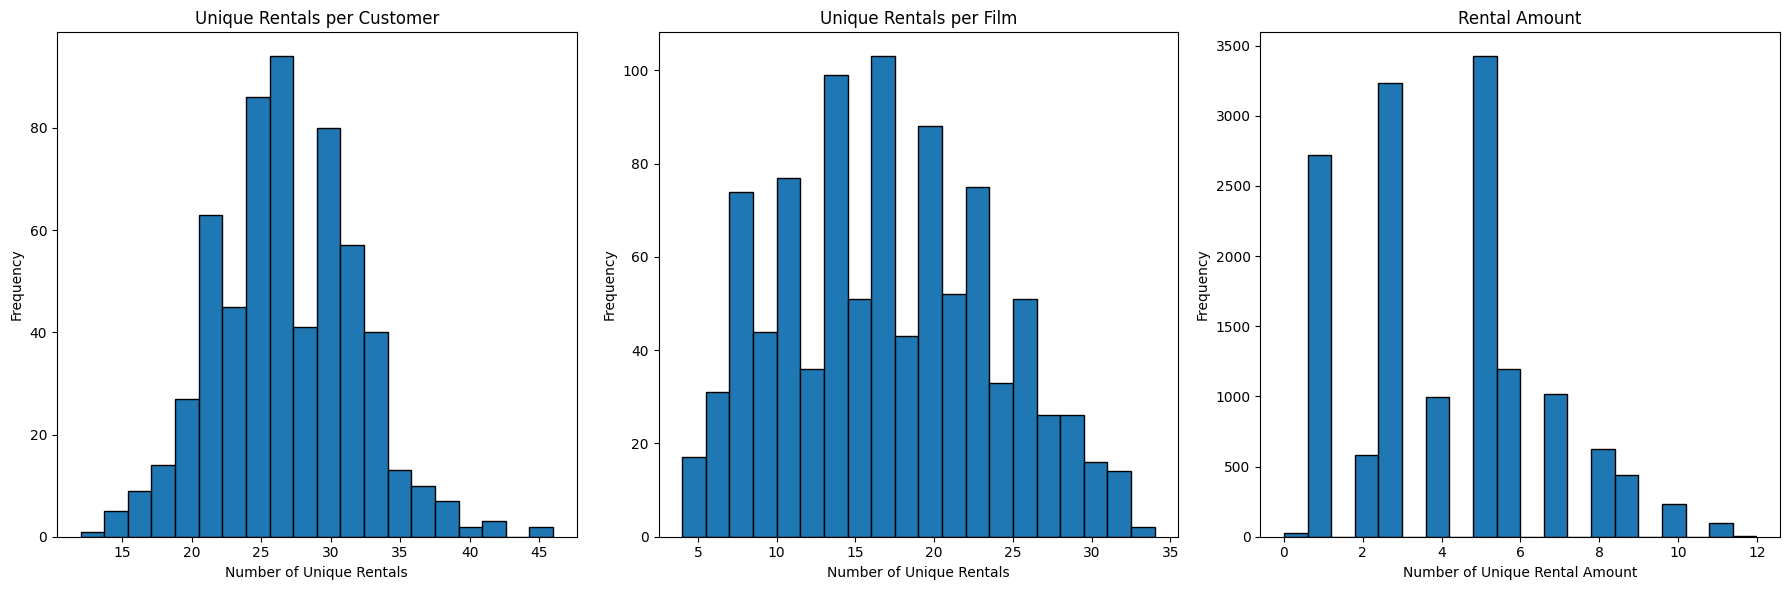

In [29]:
customer_dist = sales.groupby("customer_id")["rental_id"].nunique().reset_index()["rental_id"]
rent_dist = sales.groupby("film_id")["rental_id"].nunique().reset_index()["rental_id"]
cat_dist = sales.groupby("category_id")["rental_id"].nunique().reset_index()["rental_id"]

fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # Adjust size for better visualization

# Plot each distribution
ax[0].hist(customer_dist, bins=20, edgecolor='black')
ax[0].set_title("Unique Rentals per Customer")
ax[0].set_xlabel("Number of Unique Rentals")
ax[0].set_ylabel("Frequency")

ax[1].hist(rent_dist, bins=20, edgecolor='black')
ax[1].set_title("Unique Rentals per Film")
ax[1].set_xlabel("Number of Unique Rentals")
ax[1].set_ylabel("Frequency")

ax[2].hist(sales["amount"], bins=20, edgecolor='black')
ax[2].set_title("Rental Amount")
ax[2].set_xlabel("Number of Unique Rental Amount")
ax[2].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()

* An Average Cutomer will rental 20 Time
* Also the average the per film rent for 20 time
* the highest revenue of the film is 6$

C:\Users\GOPINATH\AppData\Local\Temp\ipykernel_10412\3971236884.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_inventory, x="category_name", y="amount", ax=ax[0,1], palette="viridis")
C:\Users\GOPINATH\AppData\Local\Temp\ipykernel_10412\3971236884.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rating_movies, x="rating", y="movie_count", ax=ax[1, 0], palette="coolwarm")
C:\Users\GOPINATH\AppData\Local\Temp\ipykernel_10412\3971236884.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rating_movies, x="rating", 

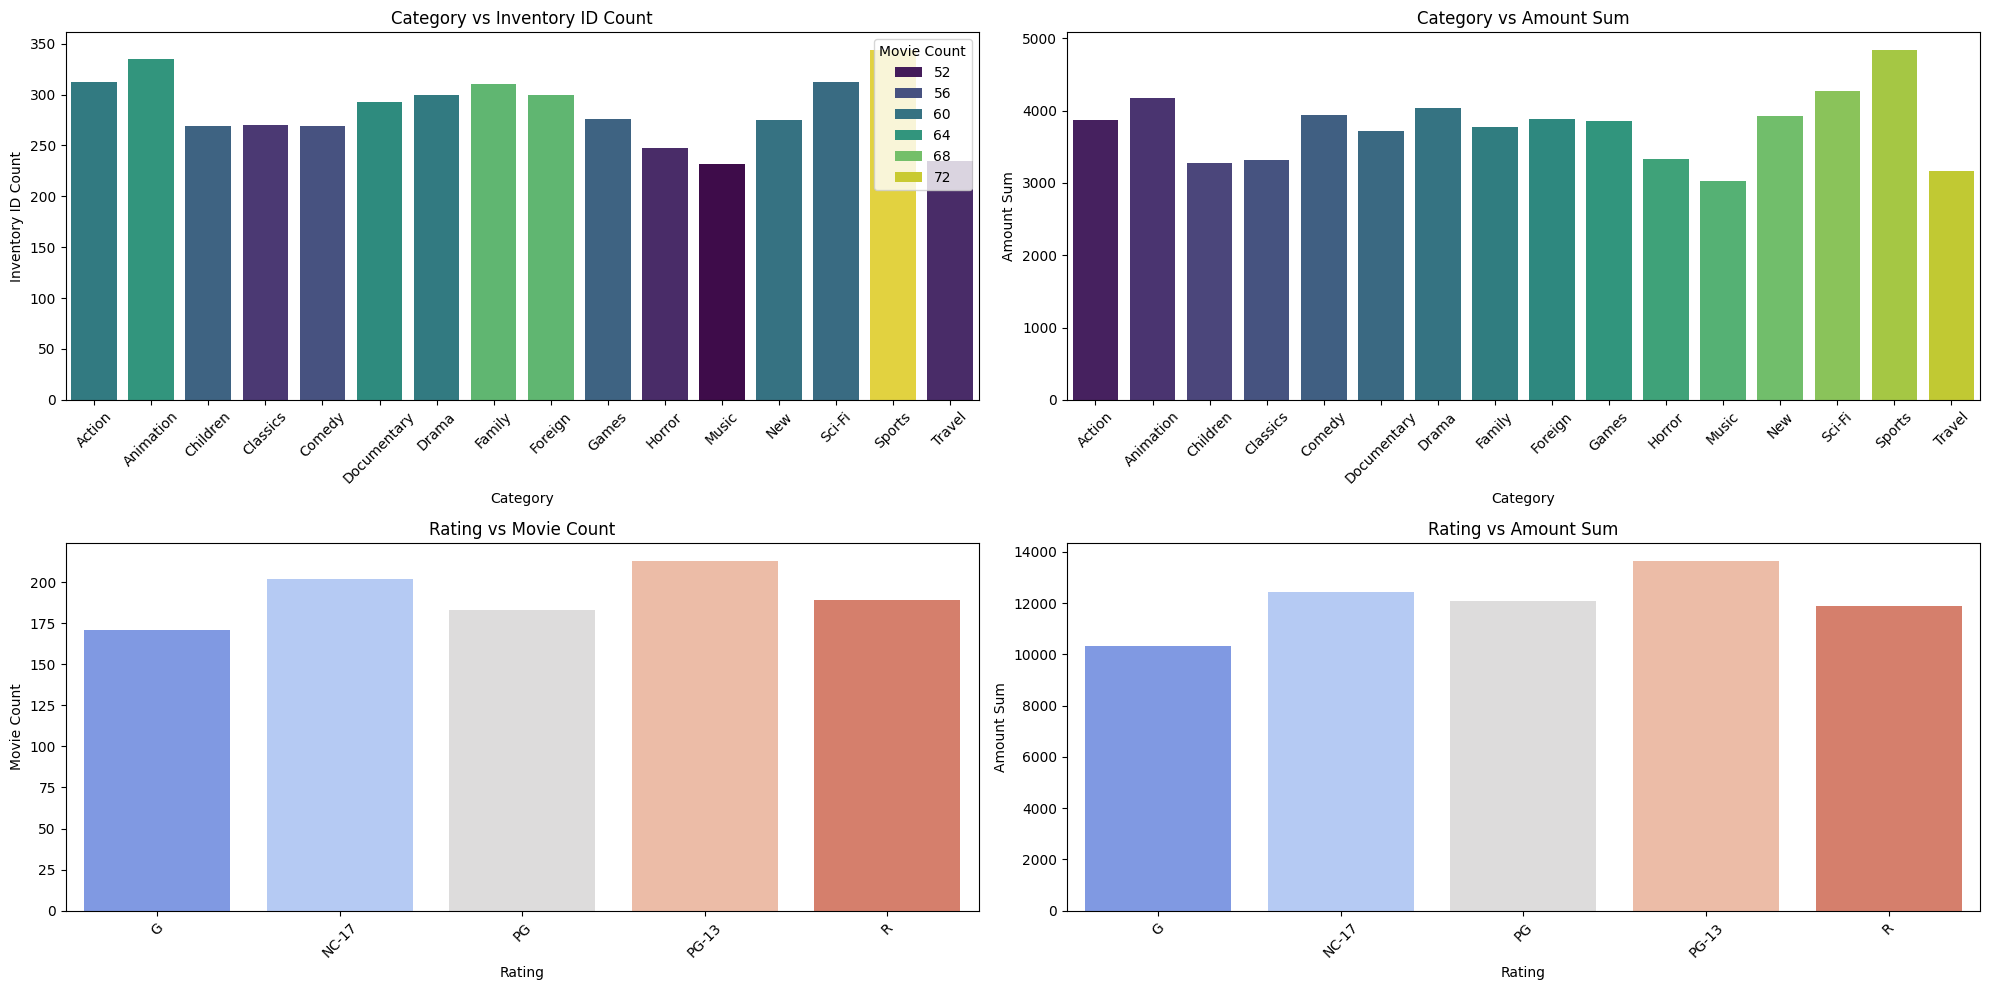

In [32]:
# 2. Category vs Inventory ID Count (Hue: Movie Count)
cat_inventory = sales.groupby("category_name")["inventory_id"].nunique().reset_index()
cat_inventory["movie_count"] = sales.groupby("category_name")["film_id"].nunique().values
cat_inventory["amount"] = sales.groupby("category_name")["amount"].sum().values

# 3. Rating vs Movie Count
rating_movies = sales.groupby("rating")["film_id"].nunique().reset_index()
rating_movies.columns = ["rating", "movie_count"]
rating_movies["amount"] = sales.groupby("rating")["amount"].sum().values

# Create a 2x3 grid of subplots
fig, ax = plt.subplots(2, 2, figsize=(20,10))  # Adjusted figsize for better spacing


# Category vs Inventory ID Count (Hue: Movie Count)
sns.barplot(data=cat_inventory, x="category_name", y="inventory_id", hue="movie_count", ax=ax[0, 0], palette="viridis")
ax[0, 0].set_title("Category vs Inventory ID Count")
ax[0, 0].set_xlabel("Category")
ax[0, 0].set_ylabel("Inventory ID Count")
ax[0, 0].tick_params(axis='x', rotation=45)
ax[0, 0].legend(title="Movie Count")

# Category vs Amount Sum
sns.barplot(data=cat_inventory, x="category_name", y="amount", ax=ax[0,1], palette="viridis")
ax[0, 1].set_title("Category vs Amount Sum")
ax[0, 1].set_xlabel("Category")
ax[0, 1].set_ylabel("Amount Sum")
ax[0, 1].tick_params(axis='x', rotation=45)

# Rating vs Movie Count
sns.barplot(data=rating_movies, x="rating", y="movie_count", ax=ax[1, 0], palette="coolwarm")
ax[1, 0].set_title("Rating vs Movie Count")
ax[1, 0].set_xlabel("Rating")
ax[1, 0].set_ylabel("Movie Count")
ax[1, 0].tick_params(axis='x', rotation=45)

# Rating vs Amount Sum
sns.barplot(data=rating_movies, x="rating", y="amount", ax=ax[1, 1], palette="coolwarm")
ax[1, 1].set_title("Rating vs Amount Sum")
ax[1, 1].set_xlabel("Rating")
ax[1, 1].set_ylabel("Amount Sum")
ax[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


* Top Movie in category in both count wise and amount sports, action,animation movie
* the least musical movie and the travel related movie is not up to the level
* pg - 13 rating movies are good revnenu movie

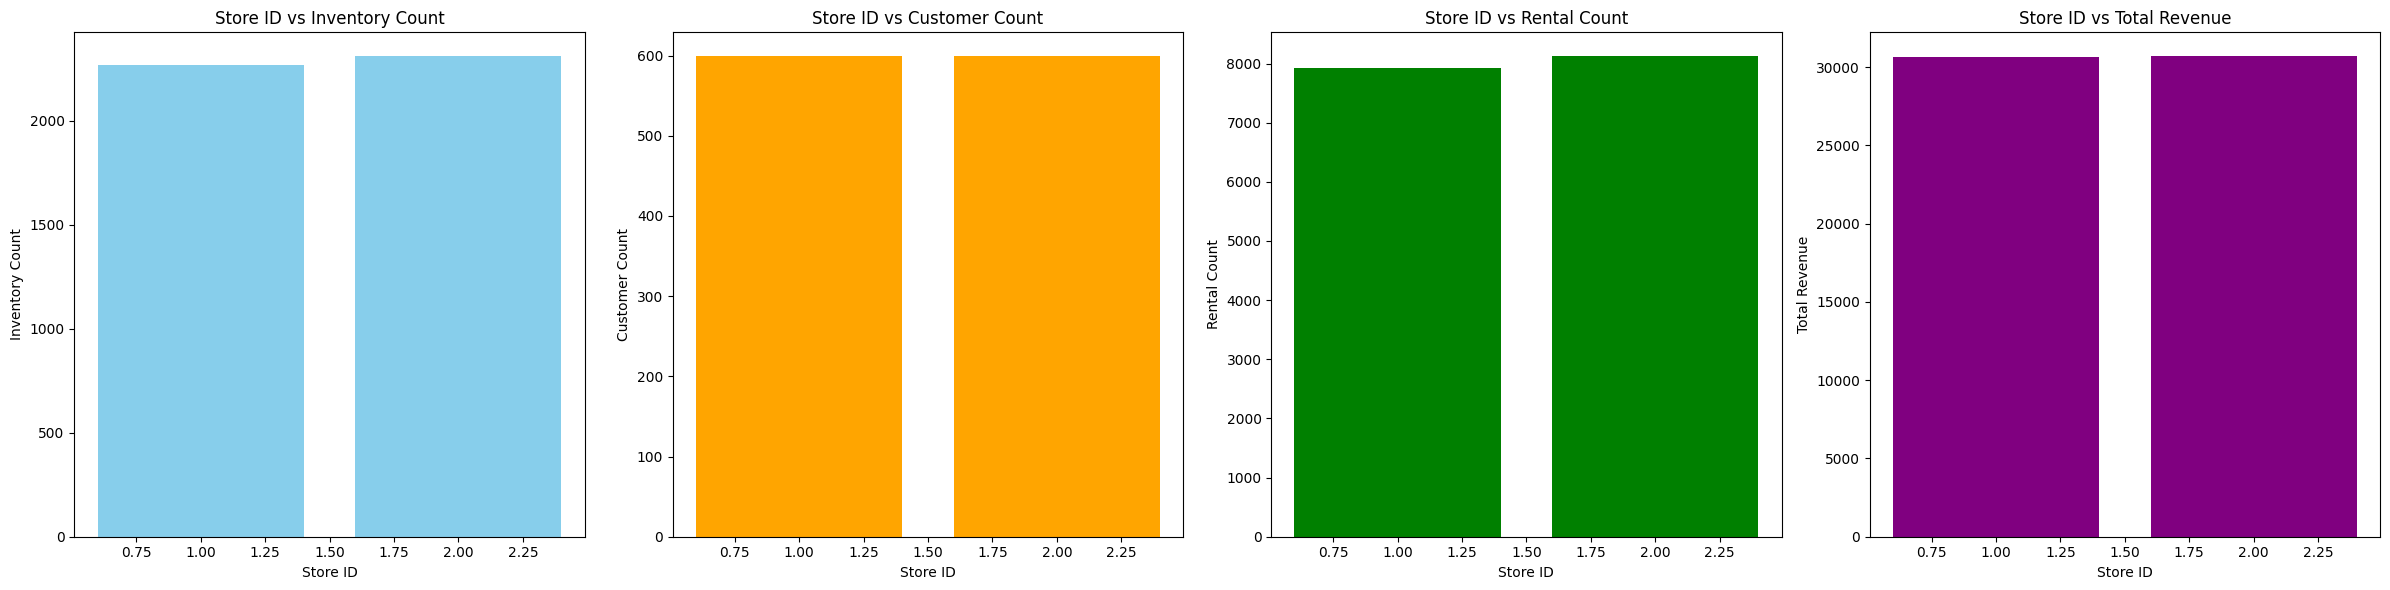

In [32]:
# Calculating metrics
store_inventory = sales.groupby("store_id")["inventory_id"].nunique().reset_index(name="inventory_count")
store_customers = sales.groupby("store_id")["customer_id"].nunique().reset_index(name="customer_count")
store_rentals = sales.groupby("store_id")["rental_id"].nunique().reset_index(name="rental_count")
store_revenue = sales.groupby("store_id")["amount"].sum().reset_index(name="total_revenue")

# Creating 1x4 subplots
fig, ax = plt.subplots(1, 4, figsize=(24, 6))

# Plot 1: Store ID vs Inventory Count
ax[0].bar(store_inventory["store_id"], store_inventory["inventory_count"], color="skyblue")
ax[0].set_title("Store ID vs Inventory Count")
ax[0].set_xlabel("Store ID")
ax[0].set_ylabel("Inventory Count")

# Plot 2: Store ID vs Customer Count
ax[1].bar(store_customers["store_id"], store_customers["customer_count"], color="orange")
ax[1].set_title("Store ID vs Customer Count")
ax[1].set_xlabel("Store ID")
ax[1].set_ylabel("Customer Count")

# Plot 3: Store ID vs Rental Count
ax[2].bar(store_rentals["store_id"], store_rentals["rental_count"], color="green")
ax[2].set_title("Store ID vs Rental Count")
ax[2].set_xlabel("Store ID")
ax[2].set_ylabel("Rental Count")

# Plot 4: Store ID vs Total Revenue
ax[3].bar(store_revenue["store_id"], store_revenue["total_revenue"], color="purple")
ax[3].set_title("Store ID vs Total Revenue")
ax[3].set_xlabel("Store ID")
ax[3].set_ylabel("Total Revenue")

# Adjust layout
plt.tight_layout()
plt.show()

* equalibirum

#### the impact of category and frequency of purchase and sales value

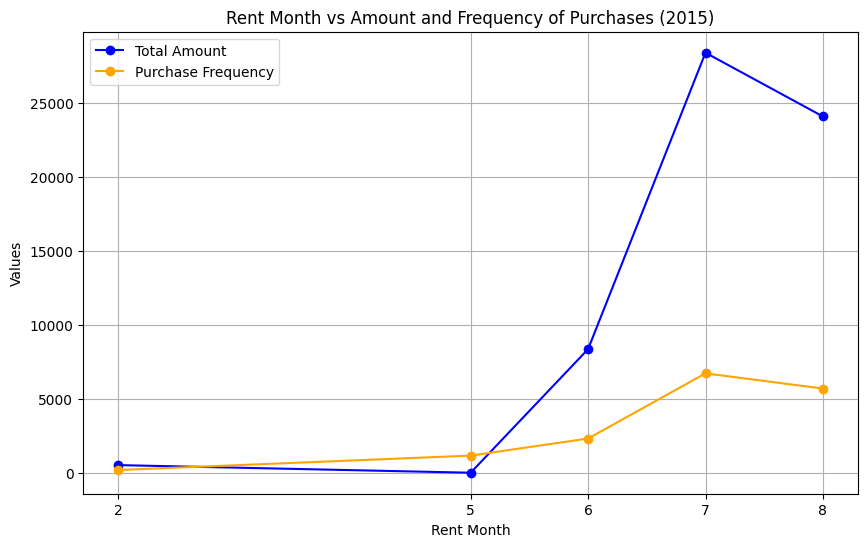

In [5]:
sales['rental_date'] = pd.to_datetime(sales['rental_date'])

# Extract year, month, and weekday
sales['rent_year'] = sales['rental_date'].dt.year
sales['rent_month'] = sales['rental_date'].dt.month
sales['rent_day'] = sales['rental_date'].dt.day_name()

# Group by 'rent_month' for amount and frequency
rent_month_amount = sales.groupby('rent_month')['amount'].sum().reset_index()
rent_month_frequency = sales.groupby('rent_month')['rental_id'].count().reset_index()
rent_month_frequency.columns = ['rent_month', 'purchase_frequency']  # Rename for clarity

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot total amount
plt.plot(rent_month_amount['rent_month'], rent_month_amount['amount'], marker='o', color='blue', label='Total Amount')

# Plot purchase frequency
plt.plot(rent_month_frequency['rent_month'], rent_month_frequency['purchase_frequency'], marker='o', color='orange', label='Purchase Frequency')

# Add titles and labels
plt.title('Rent Month vs Amount and Frequency of Purchases (2015)')
plt.xlabel('Rent Month')
plt.ylabel('Values')
plt.xticks(rent_month_amount['rent_month'])  # Ensure all months are shown as ticks
plt.legend()
plt.grid()

# Show the plot
plt.show()

* we have only data for feb,may, jun ,jul,aug
* with this data we not able to make any desision
* according to this data jul,aug huge sales

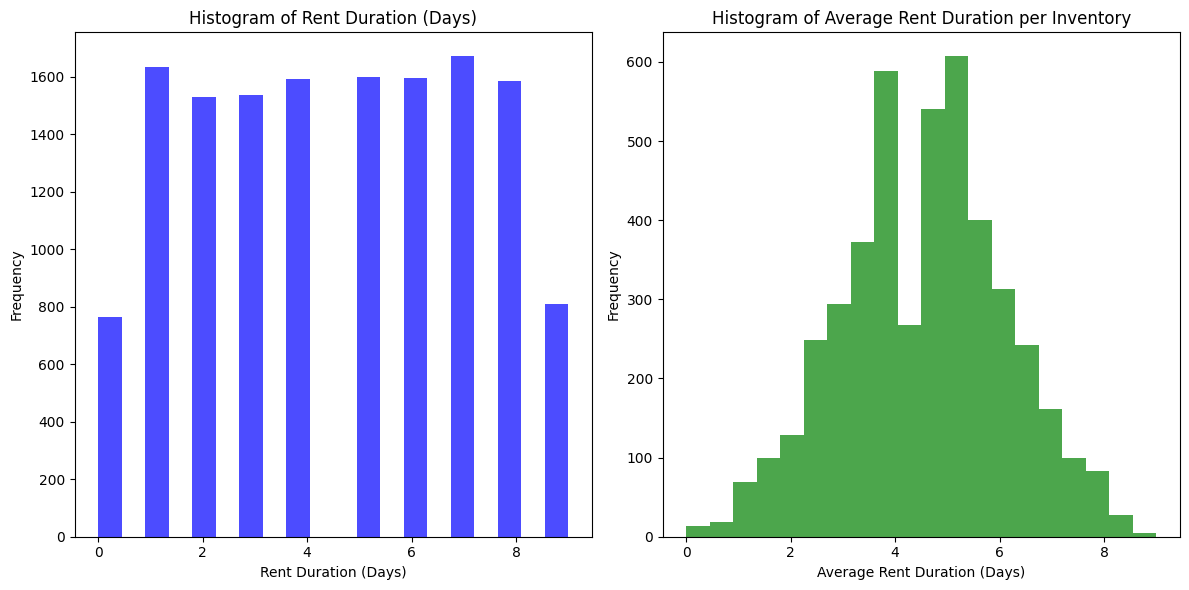

In [14]:
# Ensure datetime conversion and rent duration calculation
sales.dropna(how="any", inplace=True)
sales['rental_date'] = pd.to_datetime(sales['rental_date'])
sales['return_date'] = pd.to_datetime(sales['return_date'])

# Calculate the duration in days
sales["rent_duration"] = sales["return_date"] - sales["rental_date"]
sales["rent_duration_days"] = sales["rent_duration"].dt.days
sales.drop(columns=["rent_duration"], inplace=True)

# Calculate the average rent duration grouped by 'inventory_id'
average_return_days = sales.groupby('inventory_id')['rent_duration_days'].mean().reset_index()
average_return_days.columns = ['inventory_id', 'average_rent_duration_days']

# Create 1x2 subplots for the histograms
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot the histogram for individual rent durations
ax[0].hist(sales["rent_duration_days"], bins=20, color='blue', alpha=0.7)
ax[0].set_title("Histogram of Rent Duration (Days)")
ax[0].set_xlabel("Rent Duration (Days)")
ax[0].set_ylabel("Frequency")

# Plot the histogram for average rent durations
ax[1].hist(average_return_days["average_rent_duration_days"], bins=20, color='green', alpha=0.7)
ax[1].set_title("Histogram of Average Rent Duration per Inventory")
ax[1].set_xlabel("Average Rent Duration (Days)")
ax[1].set_ylabel("Frequency")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [15]:
actor_analys = pd.read_csv("Data/actor_analys.csv")
actor_analys.dropna(how = "any", inplace = True)
actor_analys.drop(columns = "Unnamed: 0",inplace = True)
actor_analys

,customer_id,film_id,amount,customer_name,customer_last_name,customer_district,customer_city,customer_country,rental_id,category_name,actor_id,actor_first_name,actor_last_name
0,431.0,1,0.99,Joel,Francisco,Chuquisaca,Sucre,Bolivia,4863.0,Documentary,1,Penelope,Guiness
1,431.0,1,0.99,Joel,Francisco,Chuquisaca,Sucre,Bolivia,4863.0,Documentary,10,Christian,Gable
2,431.0,1,0.99,Joel,Francisco,Chuquisaca,Sucre,Bolivia,4863.0,Documentary,20,Lucille,Tracy
3,431.0,1,0.99,Joel,Francisco,Chuquisaca,Sucre,Bolivia,4863.0,Documentary,30,Sandra,Peck
4,431.0,1,0.99,Joel,Francisco,Chuquisaca,Sucre,Bolivia,4863.0,Documentary,40,Johnny,Cage
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88009,401.0,1000,4.99,Tony,Carranza,Fukushima,Koriyama,Japan,9701.0,Comedy,166,Nick,Degeneres
88010,401.0,1000,4.99,Tony,Carranza,Fukushima,Koriyama,Japan,9701.0,Comedy,178,Lisa,Monroe
88011,541.0,1000,7.99,Darren,Windham,Toscana,Livorno,Italy,12894.0,Comedy,155,Ian,Tandy
88012,541.0,1000,7.99,Darren,Windham,Toscana,Livorno,Italy,12894.0,Comedy,166,Nick,Degeneres


In [22]:
# Top 10 actors by movie count (unique film_id)
top_actors_movie_count = (
    actor_analys.groupby(["actor_first_name", "actor_last_name"])["film_id"]
    .nunique()
    .reset_index()
    .sort_values("film_id", ascending=False)
    .head(10)
)
top_actors_movie_count.columns = ["actor_first_name", "actor_last_name", "unique_movie_count"]


In [23]:
# Top 10 actors by total amount
top_actors_amount = (
    actor_analys.groupby(["actor_first_name", "actor_last_name"])["amount"]
    .sum()
    .reset_index()
    .sort_values("amount", ascending=False)
    .head(10)
)
top_actors_amount.columns = ["actor_first_name", "actor_last_name", "total_amount"]

In [24]:
# Category vs Actor Count (unique actor_id)
category_actor_count = (
    actor_analys.groupby("category_name")["actor_id"]
    .nunique()
    .reset_index()
    .sort_values("actor_id", ascending=False)
)
category_actor_count.columns = ["category_name", "unique_actor_count"]


C:\Users\GOPINATH\AppData\Local\Temp\ipykernel_10412\2971122471.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\GOPINATH\AppData\Local\Temp\ipykernel_10412\2971122471.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\GOPINATH\AppData\Local\Temp\ipykernel_10412\2971122471.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


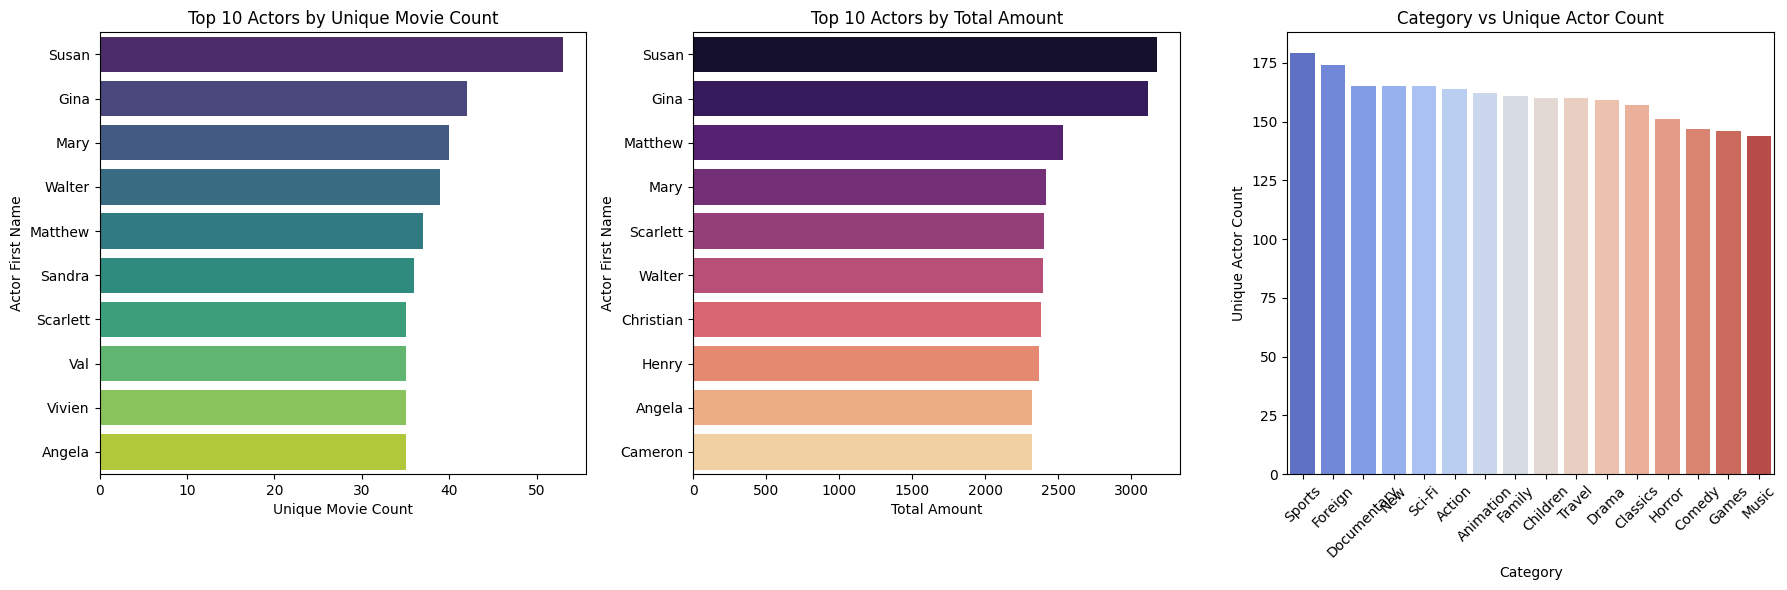

In [25]:
# Create a 1x3 subplot row
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Top 10 actors by unique movie count
sns.barplot(
    data=top_actors_movie_count,
    y="actor_first_name",
    x="unique_movie_count",
    ax=ax[0],
    palette="viridis",
)
ax[0].set_title("Top 10 Actors by Unique Movie Count")
ax[0].set_xlabel("Unique Movie Count")
ax[0].set_ylabel("Actor First Name")

# Plot 2: Top 10 actors by total amount
sns.barplot(
    data=top_actors_amount,
    y="actor_first_name",
    x="total_amount",
    ax=ax[1],
    palette="magma",
)
ax[1].set_title("Top 10 Actors by Total Amount")
ax[1].set_xlabel("Total Amount")
ax[1].set_ylabel("Actor First Name")

# Plot 3: Category vs Actor Count
sns.barplot(
    data=category_actor_count,
    x="category_name",
    y="unique_actor_count",
    ax=ax[2],
    palette="coolwarm",
)
ax[2].set_title("Category vs Unique Actor Count")
ax[2].set_xlabel("Category")
ax[2].set_ylabel("Unique Actor Count")
ax[2].tick_params(axis="x", rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

<Axes: >

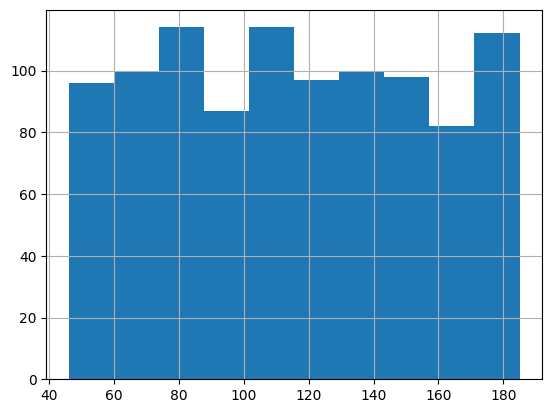

In [7]:
film["length"].hist()

In [9]:
sales

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,customer_name,customer_last_name,address_id,active,customer_district,customer_city,customer_country,amount,payment_date,film_id,store_id,store_district,store_city,store_country,category_id,category_name,release_year,rental_duration,rental_rate,length,replacement_cost,rating,special_features,language
0,4863.0,2005-07-08 19:03:15,1,431.0,2005-07-11 21:29:15,2.0,Joel,Francisco,436.0,1.0,Chuquisaca,Sucre,Bolivia,0.99,2007-04-08 17:31:41.996577,1,1,Alberta,Lethbridge,Canada,6,Documentary,2006,6,0.99,86,20.99,PG,"['Deleted Scenes', 'Behind the Scenes']",English
1,11433.0,2005-08-02 20:13:10,1,518.0,2005-08-11 21:35:10,1.0,Gabriel,Harder,524.0,1.0,Sivas,Sivas,Turkey,3.99,2007-03-02 18:41:36.996577,1,1,Alberta,Lethbridge,Canada,6,Documentary,2006,6,0.99,86,20.99,PG,"['Deleted Scenes', 'Behind the Scenes']",English
2,14714.0,2005-08-21 21:27:43,1,279.0,2005-08-30 22:26:43,1.0,Dianne,Shelton,284.0,1.0,East Azerbaidzan,Tabriz,Iran,3.99,2007-03-21 19:56:09.996577,1,1,Alberta,Lethbridge,Canada,6,Documentary,2006,6,0.99,86,20.99,PG,"['Deleted Scenes', 'Behind the Scenes']",English
3,972.0,2005-05-30 20:21:07,2,411.0,2005-06-06 00:36:07,1.0,Norman,Currier,416.0,1.0,West Java,Cianjur,Indonesia,NaN,NaN,1,1,Alberta,Lethbridge,Canada,6,Documentary,2006,6,0.99,86,20.99,PG,"['Deleted Scenes', 'Behind the Scenes']",English
4,2117.0,2005-06-17 20:24:00,2,170.0,2005-06-23 17:45:00,2.0,Beatrice,Arnold,174.0,1.0,Rajasthan,Udaipur,India,0.99,2007-02-17 18:52:26.996577,1,1,Alberta,Lethbridge,Canada,6,Documentary,2006,6,0.99,86,20.99,PG,"['Deleted Scenes', 'Behind the Scenes']",English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16044,711.0,2005-05-29 03:49:03,4581,215.0,2005-05-31 08:29:03,2.0,Jessie,Banks,219.0,1.0,Haskovo,Stara Zagora,Bulgaria,NaN,NaN,1000,2,QLD,Woodridge,Australia,5,Comedy,2006,3,4.99,50,18.99,NC-17,"['Trailers', 'Commentaries', 'Behind the Scenes']",English
16045,1493.0,2005-06-15 21:50:32,4581,235.0,2005-06-17 01:02:32,2.0,Jackie,Lynch,239.0,1.0,Valle,Buenaventura,Colombia,4.99,2007-02-15 20:18:58.996577,1000,2,QLD,Woodridge,Australia,5,Comedy,2006,3,4.99,50,18.99,NC-17,"['Trailers', 'Commentaries', 'Behind the Scenes']",English
16046,6712.0,2005-07-12 13:24:47,4581,226.0,2005-07-20 09:35:47,2.0,Maureen,Little,230.0,1.0,Asuncin,Asuncin,Paraguay,9.99,2007-04-12 11:53:13.996577,1000,2,QLD,Woodridge,Australia,5,Comedy,2006,3,4.99,50,18.99,NC-17,"['Trailers', 'Commentaries', 'Behind the Scenes']",English
16047,9701.0,2005-07-31 07:32:21,4581,401.0,2005-08-01 05:07:21,2.0,Tony,Carranza,406.0,1.0,Fukushima,Koriyama,Japan,4.99,2007-04-30 06:00:47.996577,1000,2,QLD,Woodridge,Australia,5,Comedy,2006,3,4.99,50,18.99,NC-17,"['Trailers', 'Commentaries', 'Behind the Scenes']",English


In [16]:
from sklearn.preprocessing import LabelEncoder


enc = LabelEncoder()

for i in sales.columns:
    if sales[i].dtype == "object":
        print(i)

rental_date
return_date
customer_name
customer_last_name
customer_district
customer_city
customer_country
payment_date
store_district
store_city
store_country
category_name
rating
special_features
language
